In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, rfft, rfftfreq

## Prepare Time Series Data

In [ ]:
tides_data = pd.read_csv("/content/drive/MyDrive/UWaterloo/362 Projects/TEAM-04-data.csv")

In [ ]:
print(tides_data)

              Obs_date  SLEV(metres)
0      2020/01/01 0:00          2.18
1      2020/01/01 1:00          2.78
2      2020/01/01 2:00          3.70
3      2020/01/01 3:00          4.51
4      2020/01/01 4:00          5.23
...                ...           ...
8754  2020/12/30 20:00          0.92
8755  2020/12/30 21:00          1.15
8756  2020/12/30 22:00          2.05
8757  2020/12/30 23:00          3.27
8758   2020/12/31 0:00          4.50

[8759 rows x 2 columns]


In [ ]:
tides_data['Obs_date'] = pd.to_datetime(tides_data['Obs_date'])


In [ ]:
fig = px.line(tides_data, x='Obs_date', y="SLEV(metres)")
fig.show()


In [ ]:
june_data = tides_data[(tides_data['Obs_date'].dt.month == 6)]
fig = px.line(june_data, x='Obs_date', y="SLEV(metres)")
fig.show()


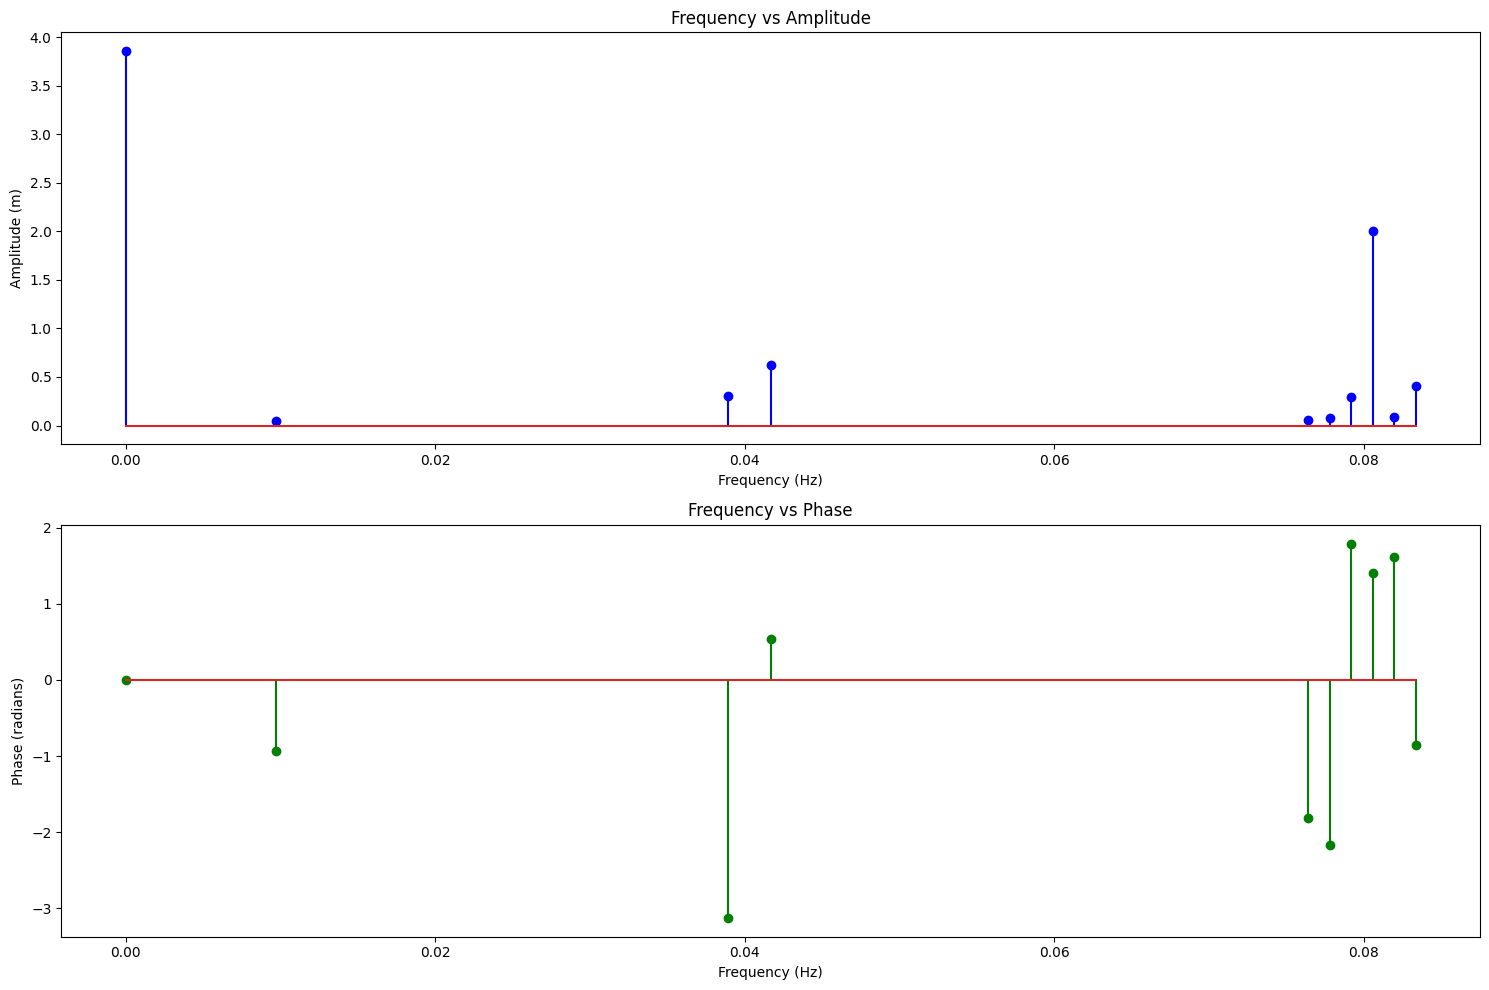

Amplitude:  0.05085839896525277 	 Frequency:  0.009722222222222222 	 Phase:  -0.936454301299594 

Amplitude:  0.055552721458541815 	 Frequency:  0.0763888888888889 	 Phase:  -1.8089419363556563 

Amplitude:  0.0774086285578 	 Frequency:  0.07777777777777778 	 Phase:  -2.1682274101967463 

Amplitude:  0.08308226427001118 	 Frequency:  0.08194444444444444 	 Phase:  1.6187287619528596 

Amplitude:  0.2894302513180835 	 Frequency:  0.07916666666666666 	 Phase:  1.791437003493518 

Amplitude:  0.30268151691676987 	 Frequency:  0.03888888888888889 	 Phase:  -3.126071327284349 

Amplitude:  0.4116928083146094 	 Frequency:  0.08333333333333334 	 Phase:  -0.8559966606291485 

Amplitude:  0.6230937305216995 	 Frequency:  0.04166666666666667 	 Phase:  0.5395725192233954 

Amplitude:  2.000033263589499 	 Frequency:  0.08055555555555556 	 Phase:  1.4099321536709981 

Amplitude:  3.8554722222222217 	 Frequency:  0.0 	 Phase:  -0.0 



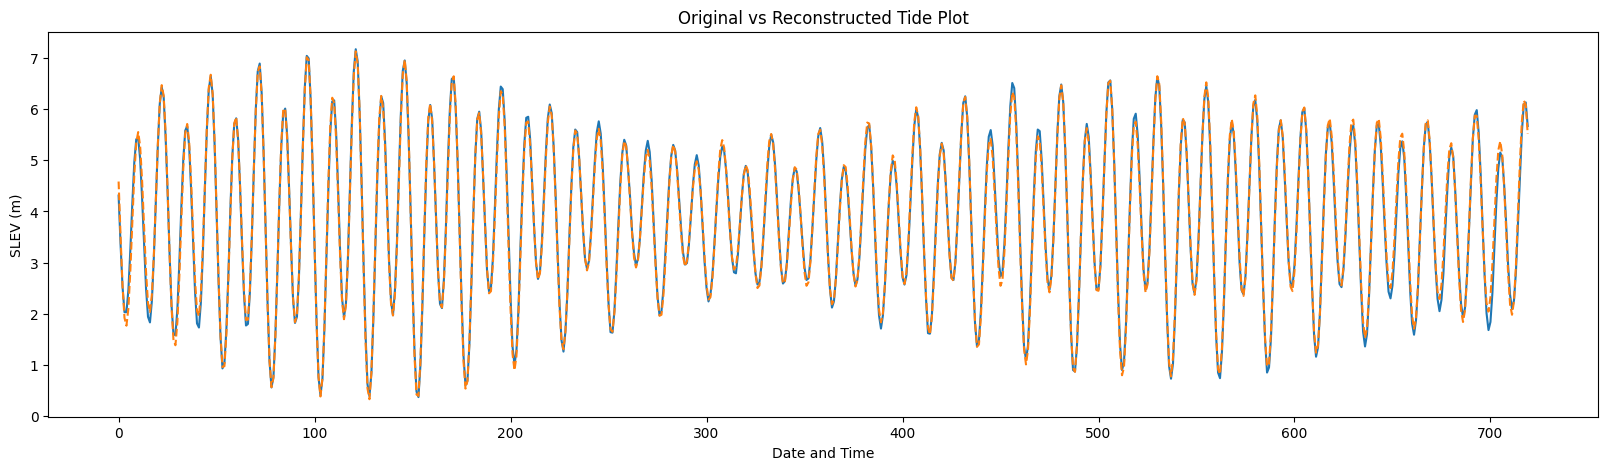

In [ ]:
y = june_data["SLEV(metres)"].values
n = y.size
timestep = 1
yFft = fft(y)[:n//2]
freqFft =  fftfreq(n, d=timestep)[:n//2]

maxIndices = np.argsort(np.abs(yFft))[-10:]
# maxIndices = maxIndices[1:] # if we wanted to remove the first index
frequencies = freqFft
amplitudes = np.append(np.abs(yFft)[0]/n, 2*np.abs(yFft)[1:]/n)
phases = np.array([np.angle(i) for i in yFft])


plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
plt.stem(frequencies[maxIndices], amplitudes[maxIndices], linefmt='blue')
plt.title('Frequency vs Amplitude')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (m)')

plt.subplot(2, 1, 2)
plt.stem(frequencies[maxIndices], phases[maxIndices], linefmt='green')
plt.title('Frequency vs Phase')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')

plt.tight_layout()
plt.show()

reconstructedTide = np.zeros(n)
t = np.arange(n)
for index in maxIndices:
  reconstructedTide += (amplitudes[index] * np.cos(2 * np.pi * frequencies[index] * t + phases[index])).astype(np.float64)
  print("Amplitude: ", amplitudes[index], "\t","Frequency: ", frequencies[index], "\t", "Phase: ", phases[index], "\n")


plt.figure(figsize=(20, 5))

plt.plot(t, june_data["SLEV(metres)"], label='Original Tide')
plt.plot(t, reconstructedTide, label='Reconstructed Tide', linestyle='--')
plt.title("Original vs Reconstructed Tide Plot")
plt.xlabel('Date and Time')
plt.ylabel('SLEV (m)')
plt.show()

In [ ]:
print(maxIndices)

[ 7 55 56 59 57 28 60 30 58  0]
